In [38]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [39]:
file_path = "./data/assignmentMathImagingRecon_chestCT.mat"
with h5py.File(file_path, 'r') as mat_file:
    for key in mat_file.keys():
        print(f"Dataset: {key}, Shape: {mat_file[key].shape}")


Dataset: imageAC, Shape: (512, 512)


1


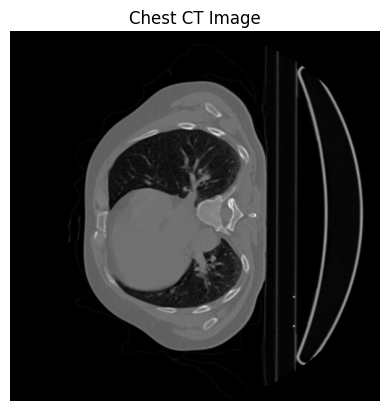

(512, 512)

In [40]:
#Loading Chest CT image
file_path = './data/assignmentMathImagingRecon_chestCT.mat'
with h5py.File(file_path, 'r') as mat:
    print(len(mat.keys()))
    dataset_name = list(mat.keys())[0]  
    chestCT = np.array(mat[dataset_name]) 
plt.imshow(chestCT, cmap='gray')
plt.axis('off') 
plt.title("Chest CT Image")
plt.show()
chestCT.shape

2
ans


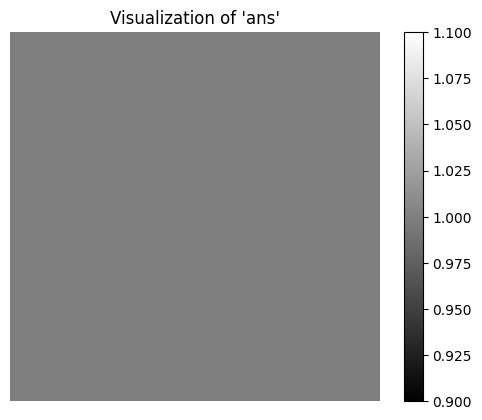

((1, 1), dtype('float64'))

In [41]:
#Loading the first image in myPhantom
file_path = "./data/assignmentMathImagingRecon_myPhantom.mat"
with h5py.File(file_path, 'r') as mat:
    print(len(mat.keys())) #There are two images
    dataset_name = list(mat.keys())[0] 
    image_data = mat[dataset_name][:]
    print(dataset_name)
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.title("Visualization of 'ans'")
plt.axis("off")
plt.show()
image_data.shape, image_data.dtype

imageMyPhantomAC


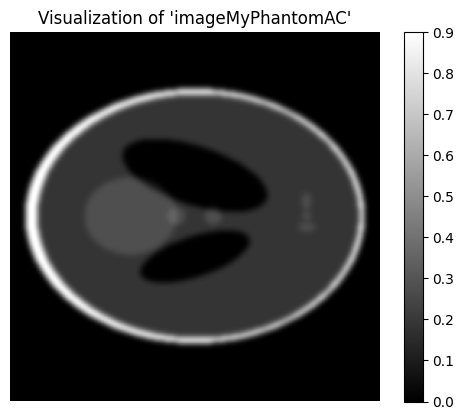

((1, 1), dtype('float64'))

In [42]:
#Loading the second image in myPhantom
file_path = "./data/assignmentMathImagingRecon_myPhantom.mat"
with h5py.File(file_path, 'r') as mat:
    dataset_name = list(mat.keys())[1] 
    myPhantom= mat[dataset_name][:]
    print(dataset_name)
plt.imshow(myPhantom, cmap='gray')
plt.colorbar()
plt.title("Visualization of 'imageMyPhantomAC'")
plt.axis("off")
plt.show()
image_data.shape, image_data.dtype

In [43]:
# Function for RRMSE:
def rrmse(A,B):
    num=np.sum((np.abs(A)-np.abs(B))**2)
    den=np.sum(np.abs(A)**2)
    rrmse=np.sqrt(num/den)
    return rrmse 

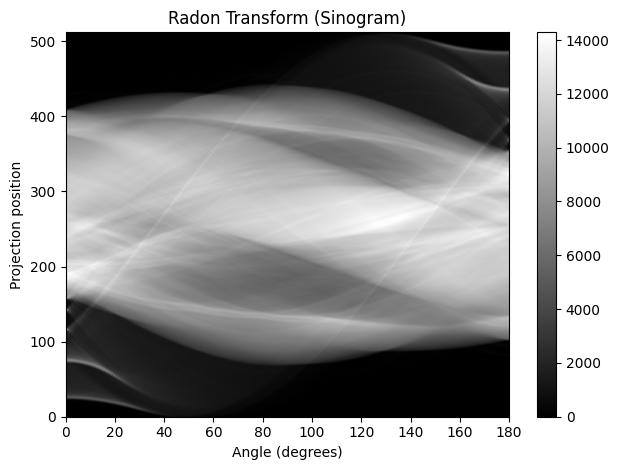

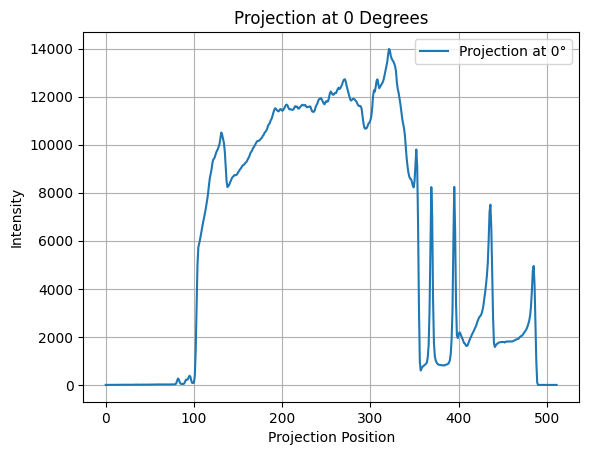

In [44]:
#TEST SINOGRAM AND PROJECTION
from skimage.transform import radon
angles = np.linspace(0, 180, 180, endpoint=False) 
# print(angles)

sinogram = radon(chestCT, theta=angles)
#Radon transform (sinogram)

plt.imshow(sinogram, cmap='gray', aspect='auto', extent=(0, 180, 0, sinogram.shape[0]))
plt.title('Radon Transform (Sinogram)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Projection position')
plt.colorbar()
plt.tight_layout()
plt.show()

projection_0 = sinogram[:, 0]

plt.plot(projection_0, label="Projection at 0°")
plt.title("Projection at 0 Degrees")
plt.xlabel("Projection Position")
plt.ylabel("Intensity")
plt.legend()
plt.grid()

In [ ]:
#TEST CALCULATION OF RRMSE
from skimage.transform import iradon
from skimage.metrics import normalized_root_mse
num_angles = 151 
theta_range = np.arange(0, 181)  # Values of θ from 0 to 180
# print(theta_range)
rrmse_chest = []  
rrmse_phantom = []  

for theta in theta_range:
    # Generate angles from θ to θ + 150
    angles = np.arange(theta, theta + num_angles) % 180 
    # print(angles)
    sinogram_chest = radon(chestCT, theta=angles, circle=True)
    sinogram_phantom = radon(myPhantom, theta=angles, circle=True)

    # Reconstruct images using Filtered Back Projection (FBP)
    recon_chest = iradon(sinogram_chest, theta=angles, filter_name='ramp', circle=True)
    recon_phantom = iradon(sinogram_phantom, theta=angles, filter_name='ramp', circle=True)

    rrmse_chest.append(rrmse(chestCT, recon_chest))
    rrmse_phantom.append(rrmse(myPhantom, recon_phantom))

    if  rrmse(chestCT, recon_chest)== min(rrmse_chest):
        best_chest_recon = recon_chest
        best_chest_theta = theta 

    if rrmse(myPhantom, recon_phantom) == min(rrmse_phantom):
        best_phantom_recon = recon_phantom
        best_phantom_theta = theta  



plt.figure(figsize=(10, 5))
plt.plot(theta_range, rrmse_chest, label="Chest CT", marker='o', markersize=3)
plt.plot(theta_range, rrmse_phantom, label="Phantom", marker='s', markersize=3)
plt.xlabel("Starting Angle θ (degrees)")
plt.ylabel("RRMSE")
plt.title("RRMSE vs. Starting Angle for Chest CT and Phantom")
plt.legend()
plt.grid()
plt.show()

# Plot the best reconstructed images
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(chestCT, cmap='gray')
axes[0, 0].set_title("Ground Truth - Chest CT")
axes[0, 0].axis("off")

axes[0, 1].imshow(best_chest_recon, cmap='gray')
axes[0, 1].set_title(f"Reconstructed Chest CT (θ={best_chest_theta})")
axes[0, 1].axis("off")

axes[1, 0].imshow(myPhantom, cmap='gray')
axes[1, 0].set_title("Ground Truth - Phantom")
axes[1, 0].axis("off")

axes[1, 1].imshow(best_phantom_recon, cmap='gray')
axes[1, 1].set_title(f"Reconstructed Phantom (θ={best_phantom_theta})")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()